In [1]:
from utils import *
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import MinMaxScaler
import keras
import pandas as pd
from sklearn.neighbors import KernelDensity

from keras.layers import Lambda, Input, Dense, Add, Activation, Concatenate
from keras.models import Model
from keras import initializers
from keras import backend as K


/home/user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [2]:
nFeat = 6
trainsize = 499889
intermediate_dim = 128
encoder_dim = 128
batch_size = 1024
latent_dim = 20
epochs = 240
eluvar = np.sqrt(1.55/intermediate_dim)

In [3]:
# def sampling(args):
#     """Reparameterization trick by sampling fr an isotropic unit Gaussian.
#     # Arguments:
#         args (tensor): mean and log of variance of Q(z|X)
#     # Returns:
#         z (tensor): sampled latent vector
#     """

#     z_mean, z_log_var = args
#     batch = K.shape(z_mean)[0]
#     dim = K.int_shape(z_mean)[1]
#     # by default, random_normal has mean=0 and std=1.0
#     epsilon = K.random_normal(shape=(batch, dim))
#     return z_mean + K.exp(0.5 * z_log_var) * epsilon

# load model

In [4]:
# def create_encoder(X,y):
# 	inputs = Concatenate()([X, y])
# 	x1 = Dense(encoder_dim, activation='elu', kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(inputs)
# 	x2 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x1)
# 	x2 = Activation('elu')(x2)
# 	x3 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x2)
# 	sc1 = Add()([x1,x3])
# 	x3 = Activation('elu')(sc1)
# 	x4 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x3)
# 	sc2 = Add()([x2,x4])
# 	x4 = Activation('elu')(sc2)
# 	x5 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x4)
# 	sc3 = Add()([x3,x5])
# 	x5 = Activation('elu')(sc3)
# 	x6 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x5)
# 	sc4 = Add()([x4,x6])
# 	x6 = Activation('elu')(sc4)
# 	z_mean = Dense(latent_dim, name='z_mean')(x6)
# 	z_log_var = Dense(latent_dim, name='z_log_var')(x6)

# 	# use reparameterization trick to push the sampling out as input
# 	# note that "output_shape" isn't necessary with the TensorFlow backend
# 	z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# 	return Model([X, y], [z_mean, z_log_var, z], name='encoder')

# encoder = create_encoder(Input(shape=(nFeat,)), Input(shape=(1,)))
# encoder.summary()

In [5]:
# def create_decoder(z,y):
# 	latent_inputs = Concatenate()([z, y])
# 	x1 = Dense(intermediate_dim, activation='elu', kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(latent_inputs)
# 	x2 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x1)
# 	x2 = Activation('elu')(x2)
# 	x3 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x2)
# 	sc1 = Add()([x1,x3])
# 	x3 = Activation('elu')(sc1)
# 	x4 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x3)
# 	sc2 = Add()([x2,x4])
# 	x4 = Activation('elu')(sc2)
# 	x5 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x4)
# 	sc3 = Add()([x3,x5])
# 	x5 = Activation('elu')(sc3)
# 	x6 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x5)
# 	sc4 = Add()([x4,x6])
# 	x6 = Activation('elu')(sc4)
# 	outputs = Dense(nFeat+1, activation='tanh')(x6)

# 	return Model([z, y], outputs, name='decoder')

# # instantiate decoder model
# decoder = create_decoder(Input(shape=(latent_dim,)), Input(shape=(1,)))
# decoder.summary()

In [6]:
# X_input = Input(shape=(nFeat,))
# y_input = Input(shape=(1,))
# z_mean, z_log_var, z = encoder([X_input,y_input])
# outputs = decoder([z,y_input])
# cvae = Model([X_input, y_input], outputs)

In [7]:
val_loss = np.load("/workdir/huichi/DeepEvents/LHCO2020/6var/cbvae_LHCO2020_val_loss.npy")

epochs = 120
val_loss = val_loss[-epochs:]

num_models = 10
idx_best_models = np.argpartition(val_loss, num_models)[:num_models]
idx_best_models

array([110,  42,  12, 116, 101,  87,  53,  94,  80, 109])

2.7376035559879653e-05
2.7360083140250847e-05
2.7368065120180356e-05


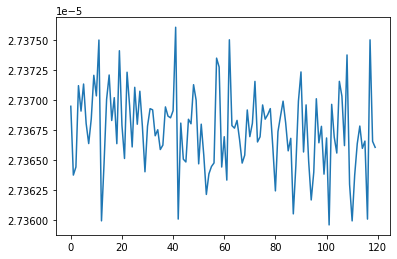

In [8]:
plt.plot(val_loss)
print(val_loss[41])
print(val_loss[42])
print(val_loss[43])

In [9]:
model1 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m119.h5')
# model1 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[0]))
# model2 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[1]))
# model3 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[2]))
# model4 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[3]))
# model5 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[4]))
# model6 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[5]))
# model7 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[6]))
# model8 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[7]))
# model9 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[8]))
# model10 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/model_cbvae_6var_m{}.h5'.format(idx_best_models[9]))


/home/user/.local/lib/python3.6/site-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [10]:
# list_of_models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
list_of_models = [model1]

In [11]:
encoder1 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m119.h5')
# encoder1 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[0]))
# encoder2 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[1]))
# encoder3 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[2]))
# encoder4 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[3]))
# encoder5 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[4]))
# encoder6 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[5]))
# encoder7 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[6]))
# encoder8 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[7]))
# encoder9 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[8]))
# encoder10 = keras.models.load_model('/workdir/huichi/DeepEvents/LHCO2020/6var/encoder_cbvae_6var_m{}.h5'.format(idx_best_models[9]))


In [12]:
list_of_encoders = [encoder1]
# list_of_encoders = [encoder1, encoder2, encoder3, encoder4, encoder5, encoder6, encoder7, encoder8, encoder9, encoder10]

# Load real data

In [13]:
innerdata_train = np.load("../CATHODE/preprocessed_data_6var/innerdata_train_6var.npy")
innerdata_train = innerdata_train[innerdata_train[:,nFeat+1]==0]

In [14]:
# check number of total events & bkg in innerdata_train

pd_innerdata_train = pd.DataFrame(innerdata_train, columns=["mjj", "mjmin", "mjmax-mjmin", "tau21j1", "tau21j2", "tau32j1", "tau32j2", "label"])
print("number of events in innerdata_train:", len(pd_innerdata_train))
pd_innerdata_train_bkg = pd_innerdata_train[pd_innerdata_train["label"]==0]
print("number of events in innerdata with label=0 (bkg):", len(pd_innerdata_train_bkg))

number of events in innerdata_train: 59605
number of events in innerdata with label=0 (bkg): 59605


In [15]:
X_innerdata_train = innerdata_train[:,1:nFeat+1]
y_innerdata_train = innerdata_train[:,0]

print("shape of X_innerdata_train:", X_innerdata_train.shape)
print("shape of y_innerdata_train:", y_innerdata_train.shape)

shape of X_innerdata_train: (59605, 6)
shape of y_innerdata_train: (59605,)


In [16]:
train_features = ["mjmin", "mjmax_minus_mjmin", "tau21j1", "tau21j2", "tau32j1", "tau32j2"]
condition_features = ["mjj"]

nFeat = len(train_features)

In [17]:
# create scaler

outerdata_train = np.load("../CATHODE/preprocessed_data_6var/outerdata_train_6var.npy")
outerdata_test = np.load("../CATHODE/preprocessed_data_6var/outerdata_test_6var.npy")
outerdata_train = outerdata_train[outerdata_train[:,nFeat+1]==0]
outerdata_test = outerdata_test[outerdata_test[:,nFeat+1]==0]

X_data_train_unscaled = outerdata_train[:,1:nFeat+1]
y_data_train_unscaled = outerdata_train[:,0]

X_data_test_unscaled = outerdata_test[:,1:nFeat+1]
y_data_test_unscaled = outerdata_test[:,0]

X_data_unscaled = np.concatenate((X_data_train_unscaled, X_data_test_unscaled), axis=0)
X_data = np.copy(X_data_unscaled)
y_data = np.concatenate((y_data_train_unscaled, y_data_test_unscaled), axis=0)

# scaler = MinMaxScaler((0,1)).fit(X_data)
# scaler_mjj = MinMaxScaler((0,1)).fit(y_data.reshape(-1,1))
x_max = np.empty(nFeat)
for i in range(0,X_data.shape[1]):
	x_max[i] = np.max(np.abs(X_data[:,i]))
	if np.abs(x_max[i]) > 0: 
		X_data[:,i] = X_data[:,i]/x_max[i]
	else:
		pass

cond_max = np.max(np.abs(y_data))
if np.abs(cond_max) > 0:
    y_data = y_data/cond_max
else:
    pass

# generate mjj distribution

In [18]:
def quick_logit(x):
    x_norm = (x-min(x))/(max(x)-min(x))
    x_norm = x_norm[(x_norm != 0) & (x_norm != 1)]
    logit = np.log(x_norm/(1-x_norm))
    logit = logit[~np.isnan(logit)]
    return logit

In [19]:
def logit_transform_inverse(data, datamax, datamin):
    
    dataout = (datamin + datamax*np.exp(data))/(1 + np.exp(data))

    return dataout

In [20]:
# fitting and sampling KDE

n_samples = 400000
# n_samples = 1200000
KDE_bandwidth = 0.01

print(y_innerdata_train.shape)
mjj_logit = quick_logit(y_innerdata_train)
train_mjj_vals = logit_transform_inverse(KernelDensity(
    bandwidth=KDE_bandwidth, kernel='gaussian').fit(
        mjj_logit.reshape(-1, 1)).sample(n_samples),
                                            max(y_innerdata_train).item(),
                                            min(y_innerdata_train).item())

print("shape of input mjj values", train_mjj_vals.shape) 

(59605,)
shape of input mjj values (400000, 1)


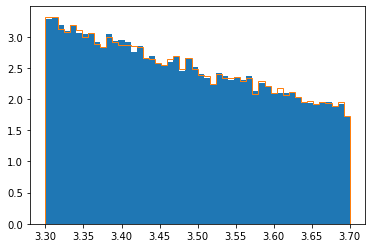

In [21]:
plt.hist(train_mjj_vals, bins=50, density=True)
plt.hist(y_innerdata_train, histtype='step', bins=50, density=True)
plt.show()

# generate data

In [22]:
def generate_cond_data(n_model,stats,y_samples):
    z_samples = np.empty([stats,latent_dim])

    mean = list_of_encoders[n_model].predict([X_data[:trainsize], y_data[:trainsize]])[0]
    logvar = list_of_encoders[n_model].predict([X_data[:trainsize], y_data[:trainsize]])[1]
    var = np.exp(logvar)
    std = np.sqrt(var)

    l=0
    for i in range(0,stats):
    	for j in range(0,latent_dim):
    		z_samples[l,j] = np.random.normal(mean[i%trainsize,j], 0.05+std[i%trainsize,j])
    	l=l+1
    new_events = list_of_models[n_model].predict([z_samples, y_samples])
    
    return new_events

In [23]:
variables_names =  train_features
vnames = train_features

plotting_ranges = [(0,0.8), (0,1), (0,1), (0,1), (0,1), (0,1)]

In [24]:
def fake_vs_real(gen_data,real_data,doLog,names):
    
    plt.figure(figsize=(20,10))
    colors = ["steelblue", "darkturquoise"]
    for p in range(0,nFeat):
        R = np.linspace(plotting_ranges[p][0],plotting_ranges[p][1],51)
        plt.subplot((nFeat+1)//2, 2, p+1)
        for rd in real_data: b_hist_y, b_hist_x, _ = plt.hist(rd[:,p], R, color="black", histtype='step', linewidth=2, label="Real Bkg", density=True)        
        for i,n in enumerate(gen_data): plt.hist(n[:,p], R, color=colors[i], histtype='stepfilled', alpha=0.5, linewidth=2, label="Generated Bkg %s"%names[i], density=True)
        # s_hist_y, s_hist_x, _ = plt.hist(sig_data[:,p], R, color="r", histtype='step', linewidth=3, label="Signal", density=True)
        plt.xlabel("%s"%variables_names[p])
        if doLog == True: plt.yscale('log')
        plt.ylabel("Number of Events / bin")
        plt.legend(fontsize="large")
        ymax_b = np.max(b_hist_y)
        # ymax_s = np.max(s_hist_y)
        plt.ylim(0,ymax_b*1.5)
    # plt.savefig("fake_gen_compare_cbvae_6var.png")

In [25]:
if np.abs(cond_max) > 0:
    train_mjj_vals_scaled = train_mjj_vals/cond_max
else:
    train_mjj_vals_scaled = train_mjj_vals

nEvent_per_model = train_mjj_vals.shape[0]//len(list_of_models)
fake_SRs = []
for i in range(len(list_of_models)):

    fake_SR = generate_cond_data(i,nEvent_per_model,train_mjj_vals_scaled[i*nEvent_per_model:(i+1)*nEvent_per_model])
    print(fake_SR.shape[0])

    for i in range(0,fake_SR.shape[1]):
    	fake_SR[:,i]=fake_SR[:,i]*x_max[i]

    fake_SRs.append(fake_SR)

400000


In [26]:
fake_SRs = np.array(fake_SRs)

In [27]:
fake_SRs.shape

(1, 400000, 6)

In [28]:
np.save("fake_SR_cbvae_6var_n400000_10BestModels.npy", np.reshape(fake_SRs, (n_samples,nFeat)))

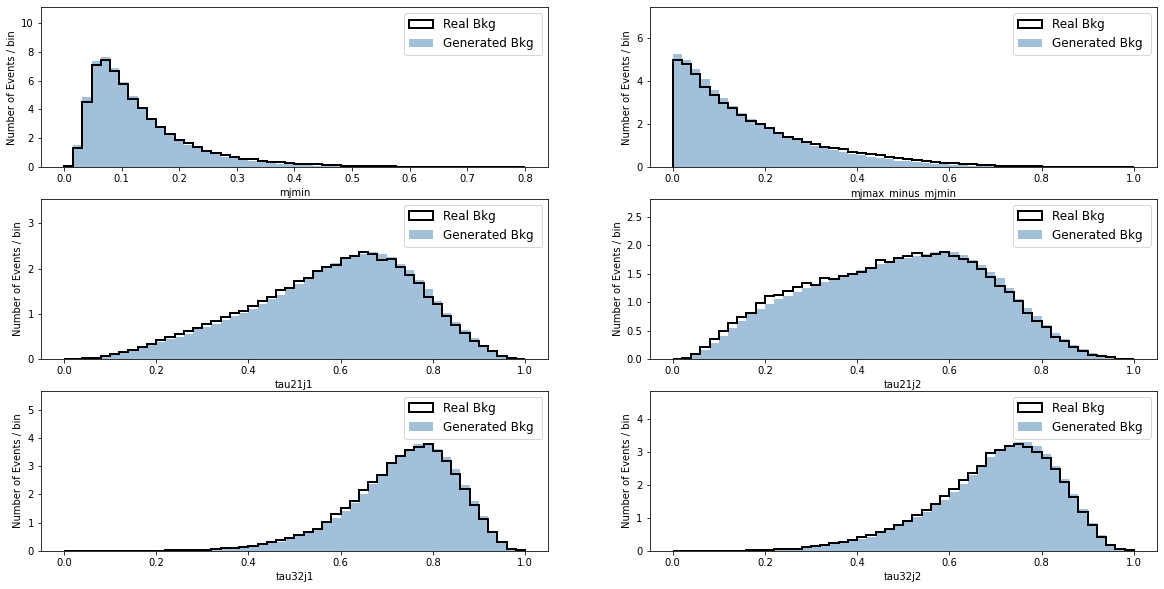

In [29]:
# cfake_sr = generate_cond_data(0,y_innerdata_train.shape[0],scaler_mjj.transform(y_innerdata_train.reshape(y_innerdata_train.shape[0],1)))
fake_vs_real([np.reshape(fake_SRs, (n_samples,nFeat))],[X_innerdata_train],0,[""])


In [ ]:
fake_SBs = []
for i in range(len(list_of_models)):

    fake_SB = generate_cond_data(i,y_data.shape[0],y_data)

    for i in range(0,fake_SB.shape[1]):
    	fake_SB[:,i]=fake_SB[:,i]*x_max[i]

    fake_SBs.append(fake_SB)

In [ ]:
fake_SBs = np.array(fake_SBs)

In [ ]:
print(fake_SBs[0].shape)

(878648, 6)


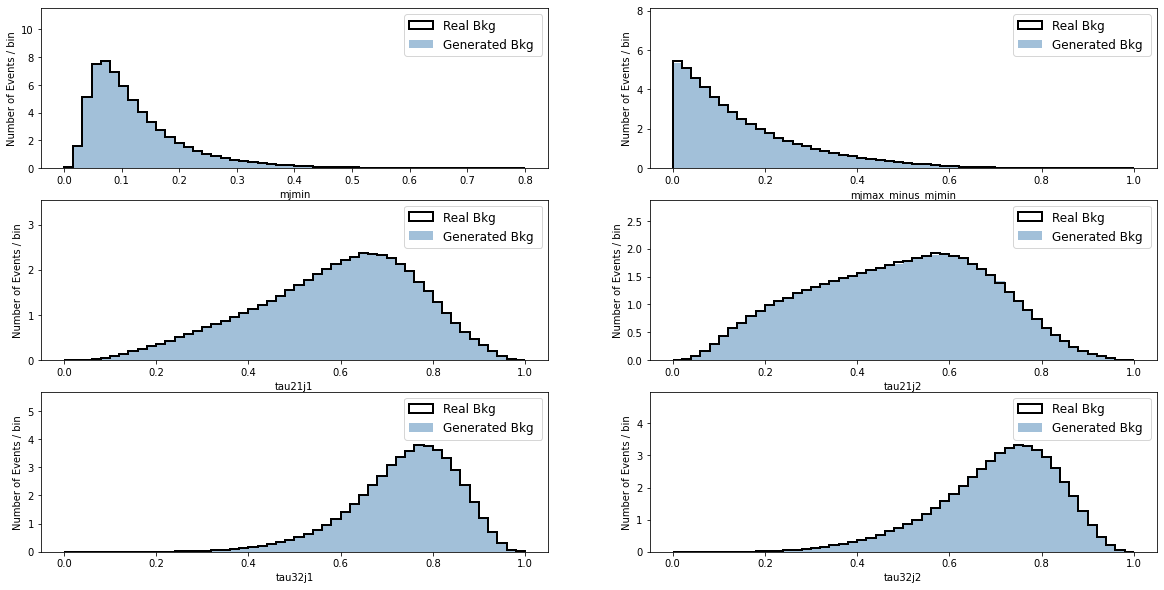

In [ ]:
fake_vs_real([fake_SBs[0]],[X_data_unscaled],0,[""])

In [ ]:
fileNameNN = '/workdir/huichi/DeepEvents/LHCO2020/6var/LHCO2020_cB-VAE_events.csv'
dfNN = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
dNN = dfNN.to_numpy()

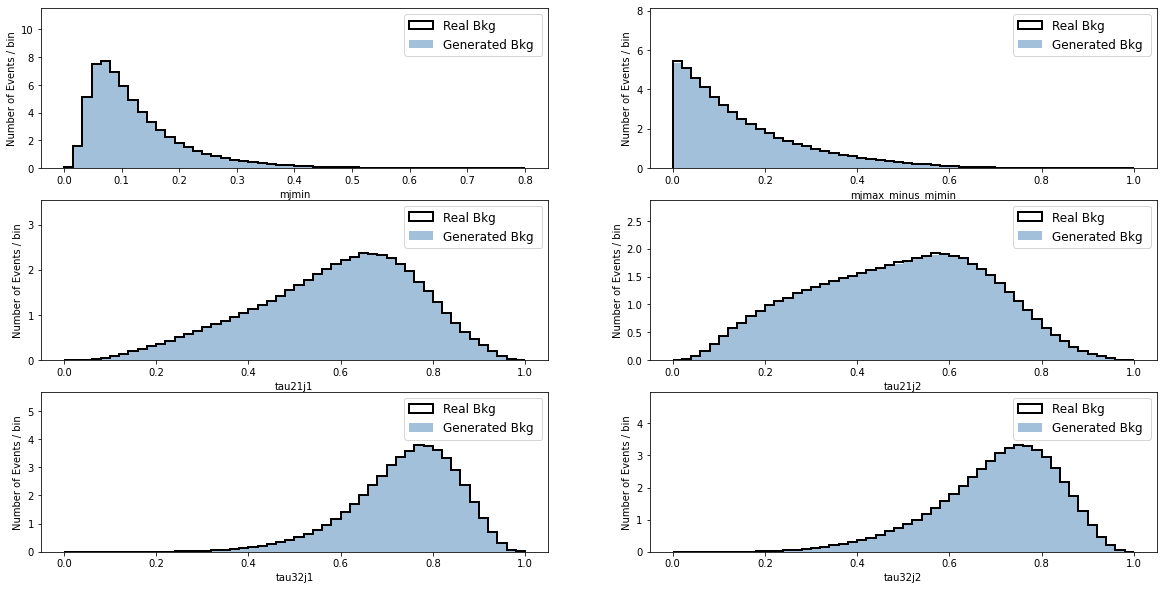

In [ ]:
fake_vs_real([dNN],[X_data_unscaled],0,[""])